In [1]:
library(dplyr)
library(mltools)
library(data.table)
library(factoextra)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
med_raw_data <- read.csv(file="medical_raw_data.csv")
summary(med_raw_data)

       X           CaseOrder      Customer_id  
 Min.   :    1   Min.   :    1   A01882 :   1  
 1st Qu.: 2501   1st Qu.: 2501   A02880 :   1  
 Median : 5000   Median : 5000   A03496 :   1  
 Mean   : 5000   Mean   : 5000   A04182 :   1  
 3rd Qu.: 7500   3rd Qu.: 7500   A05530 :   1  
 Max.   :10000   Max.   :10000   A08637 :   1  
                                 (Other):9994  
                               Interaction  
 0001dba2-59e1-43a7-ad99-647531de9efe:   1  
 0019a5ff-a005-49f6-837f-5896e8da2e1c:   1  
 0019f8df-fa72-48a8-bdf9-c5cbb9091709:   1  
 002132f6-48de-454e-8060-f59566e24f2f:   1  
 002e0f8b-2929-43cc-8f00-0a8675487362:   1  
 00361875-c9a0-4117-8cd6-3a3d689d0c76:   1  
 (Other)                             :9994  
                               UID                City          State     
 000116de50ddc69ef21f946cac6c6389:   1   Houston    :  36   TX     : 553  
 0005769c90289e51fb41fa41263463fc:   1   San Antonio:  26   CA     : 550  
 000f61c39834b0cee16b8520b5dd66

In [3]:
unique(med_raw_data$City)

[1] Eva                         Marianna                   
   [3] Sioux Falls                 New Richland               
   [5] West Point                  Braggs                     
   [7] Thompson                    Strasburg                  
   [9] Panama City                 Paynesville                
  [11] Daleville                   Casselberry                
  [13] Saint Francis               Denison                    
  [15] Sioux Center                Huntsville                 
  [17] Blythe                      Matthews                   
  [19] Lignum                      Mora                       
  [21] Saint Paul                  Maybee                     
  [23] Big Springs                 Quapaw                     
  [25] Campbellton                 Ludlow                     
  [27] Pickens                     Swiss                      
  [29] Middlefield                 Arlington                  
  [31] Niotaze                     Nantucket                  
  [33] Ft Mitchell                 Albany                     
  [35] East Thetford               Waban                      
  [37] Cambridge                   Omaha                      
  [39] West Decatur                Owingsville                
  [41] Washington                  Scranton                   
  [43] Green Pond                  Jacksonville               
  [45] Emmett                      Hustisford                 
  [47] Marne                       Freeburg                   
  [49] Kenmare                     Colusa                     
  [51] Odell                       Grove                      
  [53] Granville                   Cascade                    
  [55] Wall Lake                   Delton                     
  [57] Lynn Haven                  Lodi                       
  [59] Nashua                      Kenefic                    
  [61] Lane                        West Bloomfield            
  [63] Ellsinore                   Savoonga                   
  [65] Albuquerque                 Stoddard                   
  [67] Rockmart                    Bannock                    
  [69] Belleville                  Cornelius                  
  [71] Accokeek                    Waynesville                
  [73] Fordville                   Pioneer                    
  [75] West Mifflin                Cynthiana                  
  [77] San Marcos                  Waucoma                    
  [79] Skamokawa                   Riverside                  
  [81] Nashville                   Webb                       
  [83] Whittier                    Caroleen                   
  [85] Papillion                   Madison                    
  [87] Adolphus                    Atwood                     
  [89] Milwaukee                   Palmerton                  
  [91] Lasara                      Lincoln                    
  [93] North Bend                  Salisbury                  
  [95] Cerro Gordo                 Elizabeth                  
  [97] Moline                      Greentop                   
  [99] Stockton                    New Hyde Park              
 [101] Williamsfield               Lees Summit                
 [103] Pulaski                     Woodhull                   
 [105] Onondaga                    Millville                  
 [107] Evergreen Park              Carencro                   
 [109] Stillwater                  Green Village              
 [111] Princewick                  El Paso                    
 [113] Kittanning                  Grimstead                  
 [115] Birmingham                  Boulder                    
 [117] Minneapolis                 Elroy                      
 [119] Summit Argo                 Midkiff                    
 [121] Kansas City                 Newport Coast              
 [123] Neffs                       Roaring River              
 [125] Inverness                   Newalla                    
 [127] Seminole                   

In [4]:
unique(med_raw_data$State)

[1] AL FL SD MN VA OK OH MS WI IA CA IN MO MI NE PA AR WV KS MA KY NY VT DC IL
[26] ND SC AK NM NH GA NC MD TN WA TX CO NJ LA OR AZ ME ID UT RI MT PR NV CT HI
[51] WY DE
52 Levels: AK AL AR AZ CA CO CT DC DE FL GA HI IA ID IL IN KS KY LA MA ... WY

In [5]:
unique(med_raw_data$County)

[1] Morgan                Jackson               Minnehaha            
   [4] Waseca                King William          Muskogee             
   [7] Geauga                Shenandoah            Bay                  
  [10] Stearns               Lauderdale            Seminole             
  [13] Milwaukee             Crawford              Sioux                
  [16] Madison               Riverside             Grant                
  [19] Culpeper              Pettis                Ramsey               
  [22] Monroe                Deuel                 Ottawa               
  [25] McKean                Desha                 Fayette              
  [28] Chautauqua            Nantucket             Kenton               
  [31] Albany                Orange                Middlesex            
  [34] Douglas               Clearfield            Bath                 
  [37] District of Columbia  Lackawanna            Bibb                 
  [40] Calhoun               Pottawatomie          Dodge                
  [43] Cass                  St. Clair             Ward                 
  [46] Colusa                Livingston            Delaware             
  [49] Monongalia            Pittsylvania          Sac                  
  [52] Barry                 Columbia              Wilkin               
  [55] Johnston              Williamsburg          Oakland              
  [58] Butler                Nome                  Bernalillo           
  [61] Cheshire              Polk                  Belmont              
  [64] Wayne                 Mecklenburg           Prince George's      
  [67] Haywood               Walsh                 Scott                
  [70] Allegheny             Posey                 San Diego            
  [73] Winneshiek            Wahkiakum             Walker               
  [76] Davidson              Tallahatchie          Valdez-Cordova       
  [79] Rutherford            Sarpy                 Allen                
  [82] Carbon                Willacy               Benton               
  [85] Wicomico              Columbus              Elbert               
  [88] Rock Island           Adair                 San Joaquin          
  [91] Nassau                Ashtabula             Pulaski              
  [94] Steuben               Ingham                Cumberland           
  [97] Giles                 Cook                  Lafayette            
 [100] Payne                 Morris                Raleigh              
 [103] El Paso               Armstrong             Mathews              
 [106] Jefferson             Warren                Boulder              
 [109] Hennepin              Juneau                Upton                
 [112] Clay                  Wilkes                Citrus               
 [115] Cleveland             Pinellas              Faulkner             
 [118] Multnomah             Denver                Dallas               
 [121] Muscogee              Marion                Broward              
 [124] Apache                Adams                 Hancock              
 [127] Lemhi                 Bexar                 Baylor               
 [130] Decatur               Pitt                  Sevier               
 [133] McDonough             Miami-Dade            Pickaway             
 [136] Greene                Washita               Webster              
 [139] Kern                  Sandoval              Lake                 
 [142] Washington            Forsyth               Franklin             
 [145] St. Joseph            Kent                  Shasta               
 [148] Dunn                  Tarrant               Henry                
 [151] San Juan              King                  Westchester          
 [154] Dakota                Pima                  Maricopa             
 [157] Mason                 Schuyler              Randolph             
 [160] Navajo                Rockingham            Richland             
 [163] Montgomery            Wells                 Wasco     

In [6]:
'AÃ±asco'
'BayamÃ³n'
'DoÃ±a Ana'
'MayagÃ¼ez'
'PeÃ±uelas'
'RincÃ³n'


[1] "AÃ±asco"

[1] "BayamÃ³n"

[1] "DoÃ±a Ana"

[1] "MayagÃ¼ez"

[1] "PeÃ±uelas"

[1] "RincÃ³n"

In [7]:
unique(med_raw_data$Timezone)

[1] America/Chicago                America/New_York              
 [3] America/Los_Angeles            America/Indiana/Indianapolis  
 [5] America/Detroit                America/Denver                
 [7] America/Nome                   America/Anchorage             
 [9] America/Phoenix                America/Boise                 
[11] America/Puerto_Rico            America/Yakutat               
[13] Pacific/Honolulu               America/Menominee             
[15] America/Kentucky/Louisville    America/Indiana/Vincennes     
[17] America/Toronto                America/Indiana/Marengo       
[19] America/Indiana/Winamac        America/Indiana/Tell_City     
[21] America/Sitka                  America/Indiana/Knox          
[23] America/North_Dakota/New_Salem America/Indiana/Vevay         
[25] America/Adak                   America/North_Dakota/Beulah   
26 Levels: America/Adak America/Anchorage America/Boise ... Pacific/Honolulu

In [8]:
unique(med_raw_data$Job)

[1] Psychologist, sport and exercise                           
  [2] Community development worker                               
  [3] Chief Executive Officer                                    
  [4] Early years teacher                                        
  [5] Health promotion specialist                                
  [6] Corporate treasurer                                        
  [7] Hydrologist                                                
  [8] Psychiatric nurse                                          
  [9] Computer games developer                                   
 [10] Production assistant, radio                                
 [11] Contractor                                                 
 [12] Surveyor, planning and development                         
 [13] English as a second language teacher                       
 [14] Actuary                                                    
 [15] Media planner                                              
 [16] Fast food restaurant manager                               
 [17] Horticulturist, commercial                                 
 [18] Secretary, company                                         
 [19] Designer, graphic                                          
 [20] Personnel officer                                          
 [21] Telecommunications researcher                              
 [22] Restaurant manager, fast food                              
 [23] Surveyor, minerals                                         
 [24] Architectural technologist                                 
 [25] Therapist, speech and language                             
 [26] Accounting technician                                      
 [27] Glass blower/designer                                      
 [28] Travel agency manager                                      
 [29] Illustrator                                                
 [30] Police officer                                             
 [31] Accountant, chartered public finance                       
 [32] Sport and exercise psychologist                            
 [33] Pensions consultant                                        
 [34] Community education officer                                
 [35] Radio producer                                             
 [36] Designer, television/film set                              
 [37] Conference centre manager                                  
 [38] Advertising account executive                              
 [39] Civil Service fast streamer                                
 [40] Training and development officer                           
 [41] Buyer, retail                                              
 [42] Event organiser                                            
 [43] IT technical support officer                               
 [44] Historic buildings inspector/conservation officer          
 [45] Research scientist (physical sciences)                     
 [46] Games developer                                            
 [47] Manufacturing engineer                                     
 [48] Embryologist, clinical                                     
 [49] Merchant navy officer                                      
 [50] Television floor manager                                   
 [51] Web designer                                               
 [52] Industrial buyer                                           
 [53] Aid worker                                                 
 [54] Systems developer                                          
 [55] Probation officer                                          
 [56] Scientific laboratory technician                           
 [57] Environmental health practitioner                          
 [58] Prison officer                                             
 [59] Naval architect                                            
 [60] Pilot, airline                                             
 [61] Medical sales representative        

In [9]:
unique(med_raw_data$Education)

[1] Some College, Less than 1 Year          
 [2] Some College, 1 or More Years, No Degree
 [3] GED or Alternative Credential           
 [4] Regular High School Diploma             
 [5] Bachelor's Degree                       
 [6] Master's Degree                         
 [7] Nursery School to 8th Grade             
 [8] 9th Grade to 12th Grade, No Diploma     
 [9] Doctorate Degree                        
[10] Associate's Degree                      
[11] Professional School Degree              
[12] No Schooling Completed                  
12 Levels: 9th Grade to 12th Grade, No Diploma ... Some College, Less than 1 Year

In [10]:
med_raw_data_num <- select(med_raw_data, Customer_id, Zip, Lat, Lng, Population, Children, Age, Income, VitD_levels, Doc_visits, 
                           Full_meals_eaten, VitD_supp, Initial_days, TotalCharge, Additional_charges)
summary(med_raw_data_num)

  Customer_id        Zip             Lat             Lng         
 A01882 :   1   Min.   :  610   Min.   :17.97   Min.   :-174.21  
 A02880 :   1   1st Qu.:27592   1st Qu.:35.26   1st Qu.: -97.35  
 A03496 :   1   Median :50207   Median :39.42   Median : -88.40  
 A04182 :   1   Mean   :50159   Mean   :38.75   Mean   : -91.24  
 A05530 :   1   3rd Qu.:72412   3rd Qu.:42.04   3rd Qu.: -80.44  
 A08637 :   1   Max.   :99929   Max.   :70.56   Max.   : -65.29  
 (Other):9994                                                    
   Population          Children           Age           Income        
 Min.   :     0.0   Min.   : 0.000   Min.   :18.0   Min.   :   154.1  
 1st Qu.:   694.8   1st Qu.: 0.000   1st Qu.:35.0   1st Qu.: 19450.8  
 Median :  2769.0   Median : 1.000   Median :53.0   Median : 33942.3  
 Mean   :  9965.2   Mean   : 2.098   Mean   :53.3   Mean   : 40484.4  
 3rd Qu.: 13945.0   3rd Qu.: 3.000   3rd Qu.:71.0   3rd Qu.: 54075.2  
 Max.   :122814.0   Max.   :10.000   Max.   :8

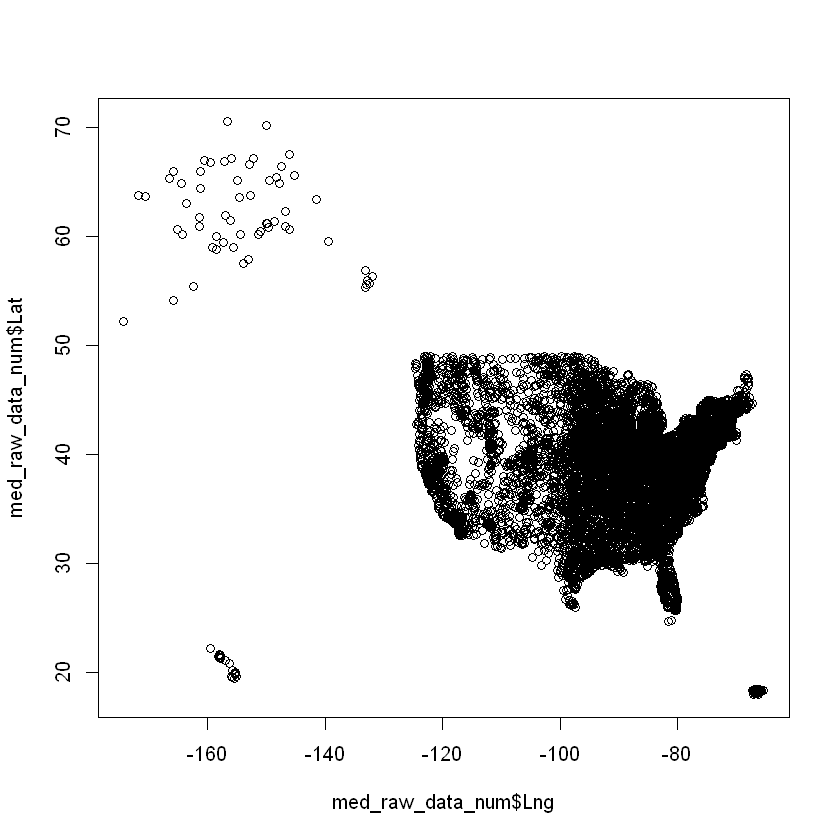

In [13]:
plot(med_raw_data_num$Lng, med_raw_data_num$Lat)

In [14]:
med_data_num <- med_raw_data_num

for (j in 2:13) {   
    i <- 0
    for (x in is.na(med_data_num[,j])) {
      i <- i + 1
      if(x == TRUE) {
        med_data_num[i,j] <- median(med_data_num[!is.na(med_data_num[,j]),j])
      }
    }
}
summary(med_data_num)

  Customer_id        Zip             Lat             Lng         
 A01882 :   1   Min.   :  610   Min.   :17.97   Min.   :-174.21  
 A02880 :   1   1st Qu.:27592   1st Qu.:35.26   1st Qu.: -97.35  
 A03496 :   1   Median :50207   Median :39.42   Median : -88.40  
 A04182 :   1   Mean   :50159   Mean   :38.75   Mean   : -91.24  
 A05530 :   1   3rd Qu.:72412   3rd Qu.:42.04   3rd Qu.: -80.44  
 A08637 :   1   Max.   :99929   Max.   :70.56   Max.   : -65.29  
 (Other):9994                                                    
   Population          Children           Age            Income        
 Min.   :     0.0   Min.   : 0.000   Min.   :18.00   Min.   :   154.1  
 1st Qu.:   694.8   1st Qu.: 1.000   1st Qu.:41.00   1st Qu.: 23956.2  
 Median :  2769.0   Median : 1.000   Median :53.00   Median : 33942.3  
 Mean   :  9965.2   Mean   : 1.814   Mean   :53.22   Mean   : 38872.4  
 3rd Qu.: 13945.0   3rd Qu.: 3.000   3rd Qu.:65.00   3rd Qu.: 46466.8  
 Max.   :122814.0   Max.   :10.000   Max

In [15]:
standardize <- function(x){
    (x-min(x))/(max(x)-min(x))
}

Data Science using Python and R 3.7 page 39

In [16]:
for (x in 2:15) {
    med_data_num[,x] <- standardize(med_data_num[,x])
}
summary(med_data_num)

  Customer_id        Zip              Lat              Lng        
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 A02880 :   1   1st Qu.:0.2717   1st Qu.:0.3287   1st Qu.:0.7056  
 A03496 :   1   Median :0.4994   Median :0.4079   Median :0.7879  
 A04182 :   1   Mean   :0.4989   Mean   :0.3952   Mean   :0.7617  
 A05530 :   1   3rd Qu.:0.7229   3rd Qu.:0.4578   3rd Qu.:0.8609  
 A08637 :   1   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 (Other):9994                                                     
   Population          Children           Age             Income      
 Min.   :0.000000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.005657   1st Qu.:0.1000   1st Qu.:0.3239   1st Qu.:0.1149  
 Median :0.022546   Median :0.1000   Median :0.4930   Median :0.1632  
 Mean   :0.081141   Mean   :0.1814   Mean   :0.4961   Mean   :0.1870  
 3rd Qu.:0.113546   3rd Qu.:0.3000   3rd Qu.:0.6620   3rd Qu.:0.2236  
 Max.   :1.000000   Max.   :1.0000   M

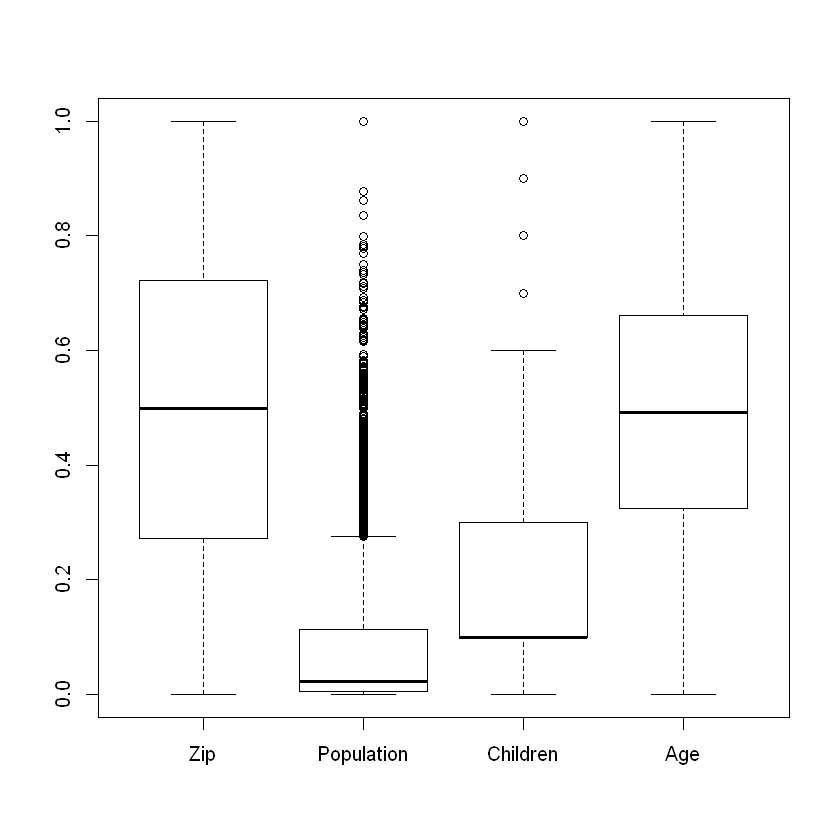

In [17]:
boxplot(med_data_num[,c(2,5:7)])

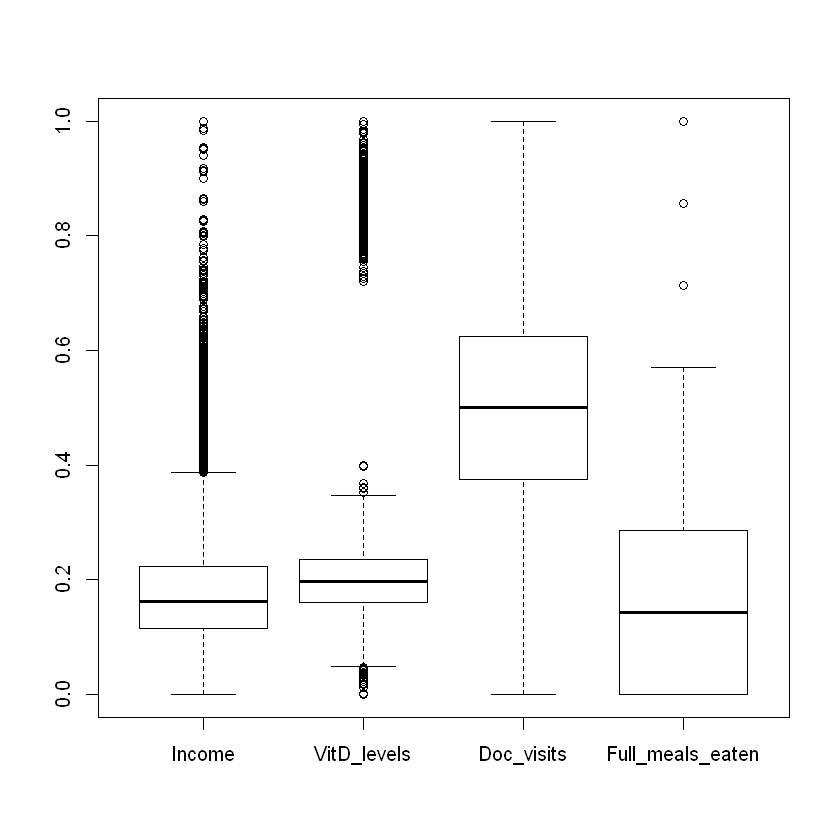

In [18]:
boxplot(med_data_num[,8:11])

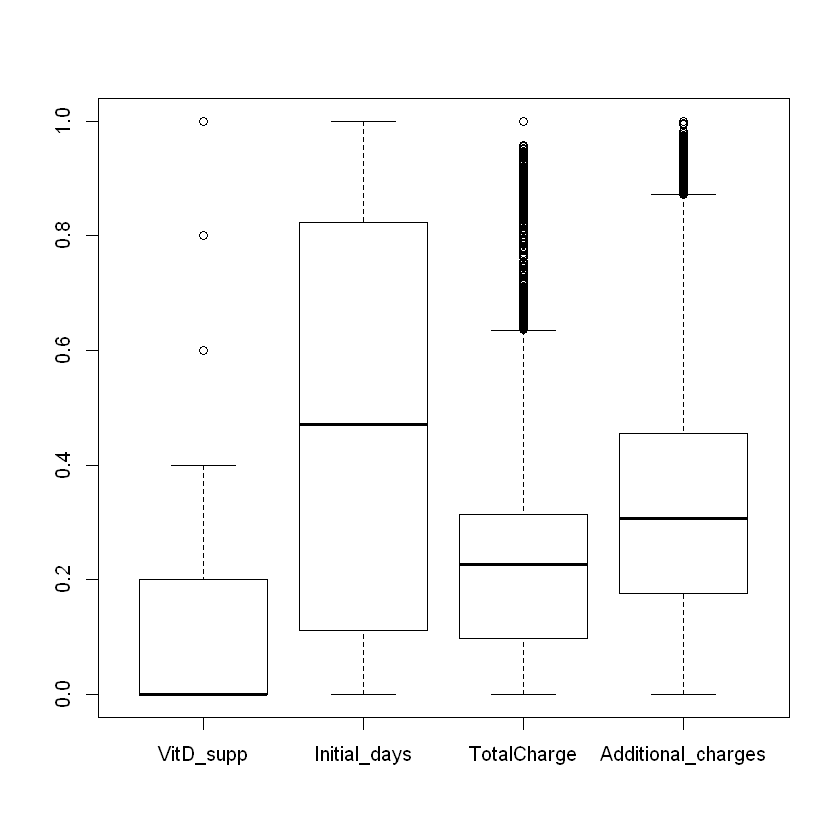

In [19]:
boxplot(med_data_num[,12:15])

In [20]:
zScore <- med_data_num
for (x in c(2, 5:15)) {
    zScore[,x] <- scale(med_data_num[,x], center=TRUE, scale=TRUE)
}
summary(zScore)

  Customer_id          Zip.V1             Lat              Lng        
 A01882 :   1   Min.   :-1.8037884   Min.   :0.0000   Min.   :0.0000  
 A02880 :   1   1st Qu.:-0.8215385   1st Qu.:0.3287   1st Qu.:0.7056  
 A03496 :   1   Median : 0.0017356   Median :0.4079   Median :0.7879  
 A04182 :   1   Mean   : 0.0000000   Mean   :0.3952   Mean   :0.7617  
 A05530 :   1   3rd Qu.: 0.8100750   3rd Qu.:0.4578   3rd Qu.:0.8609  
 A08637 :   1   Max.   : 1.8118101   Max.   :1.0000   Max.   :1.0000  
 (Other):9994                                                         
    Population.V1        Children.V1            Age.V1       
 Min.   :-0.672203   Min.   :-0.946285   Min.   :-1.9575776  
 1st Qu.:-0.625339   1st Qu.:-0.424629   1st Qu.:-0.6793610  
 Median :-0.485421   Median :-0.424629   Median :-0.0124654  
 Mean   : 0.000000   Mean   : 0.000000   Mean   : 0.0000000  
 3rd Qu.: 0.268453   3rd Qu.: 0.618685   3rd Qu.: 0.6544302  
 Max.   : 7.612181   Max.   : 4.270282   Max.   : 1.9882215 

This idea is justified by the course material 4.1

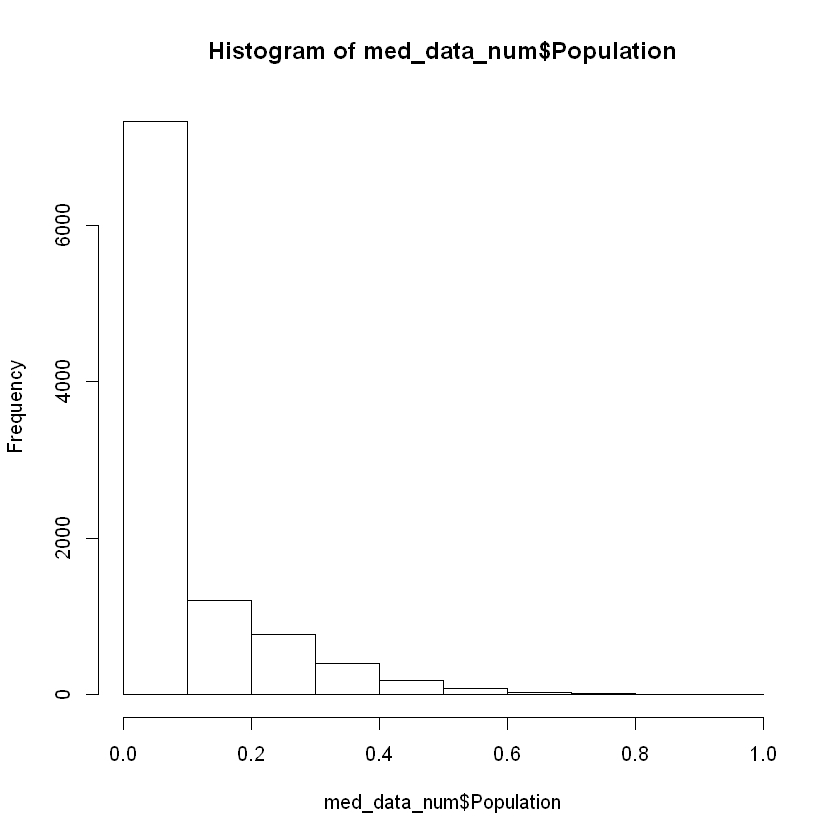

In [21]:
hist(med_data_num$Population, breaks=10)

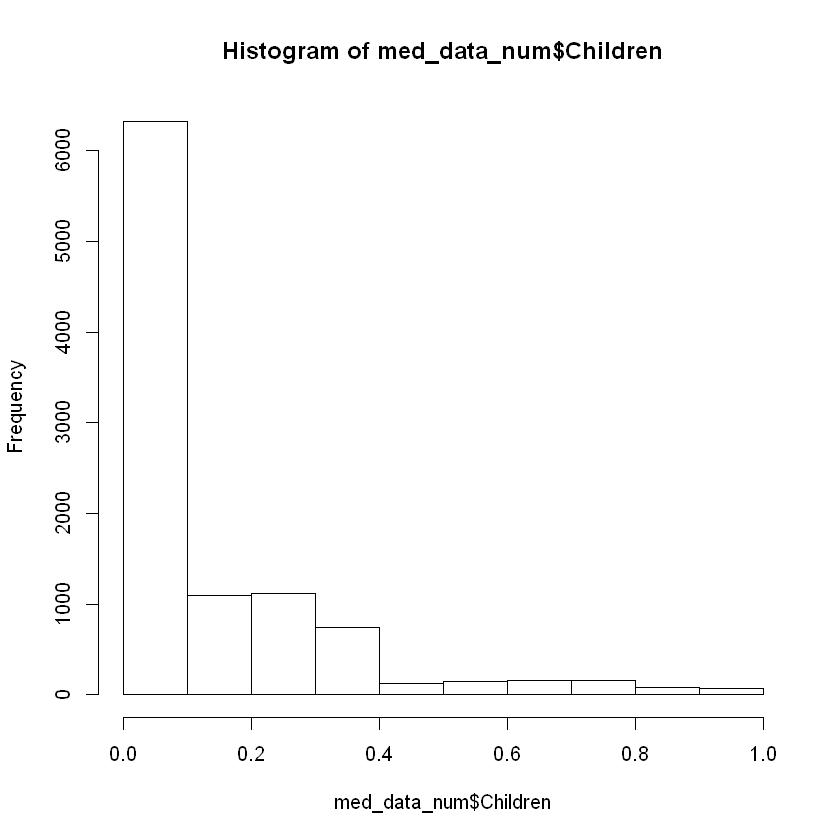

In [22]:
hist(med_data_num$Children, breaks=10)

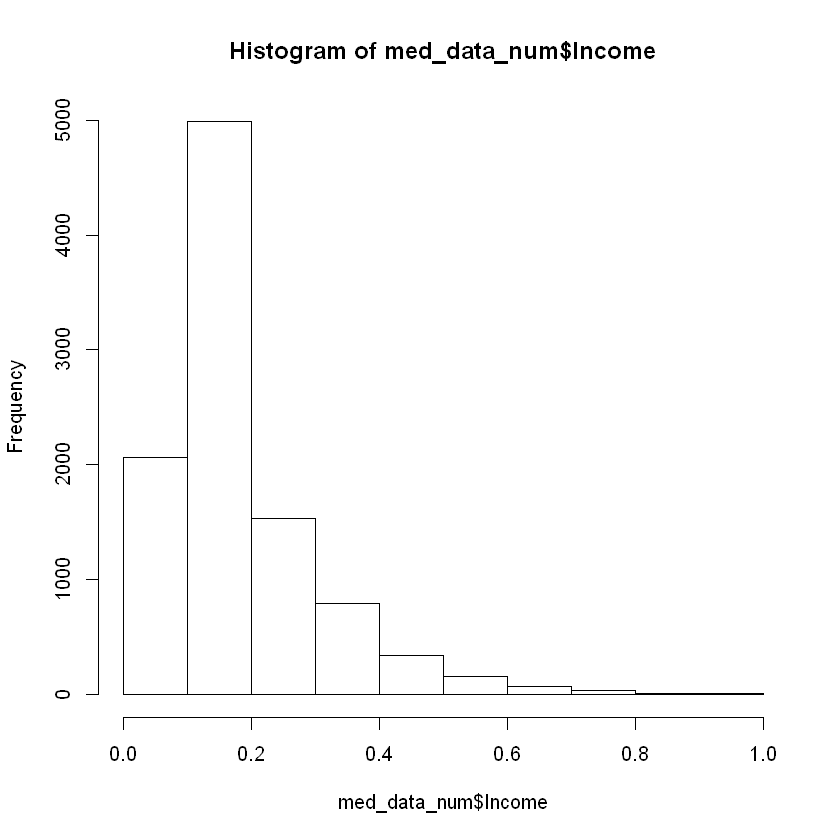

In [23]:
hist(med_data_num$Income, breaks=10)

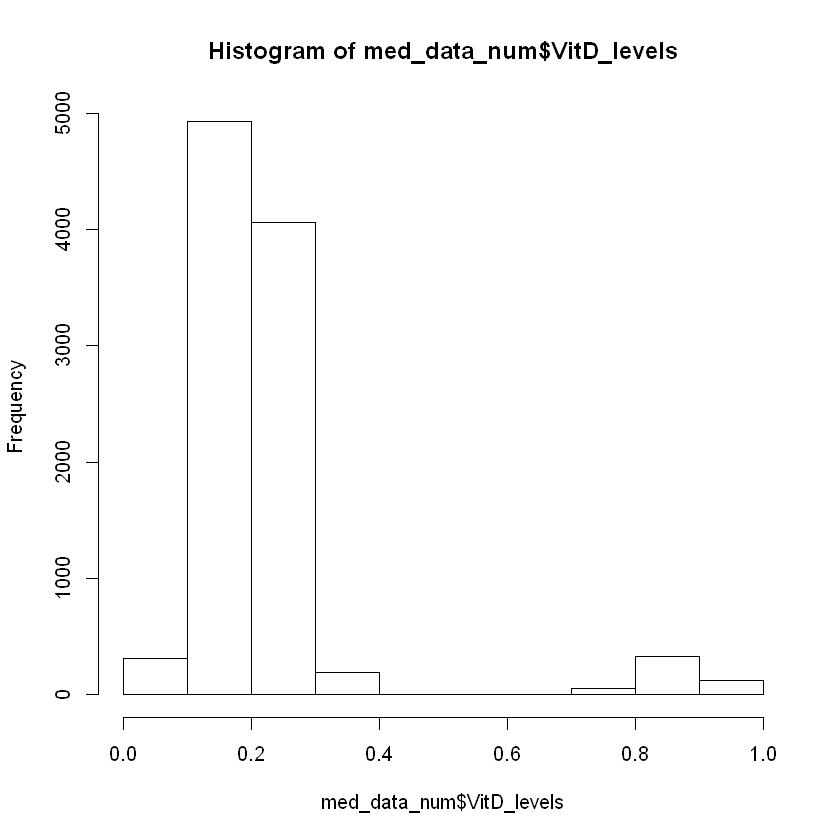

In [24]:
hist(med_data_num$VitD_levels, breaks=10)

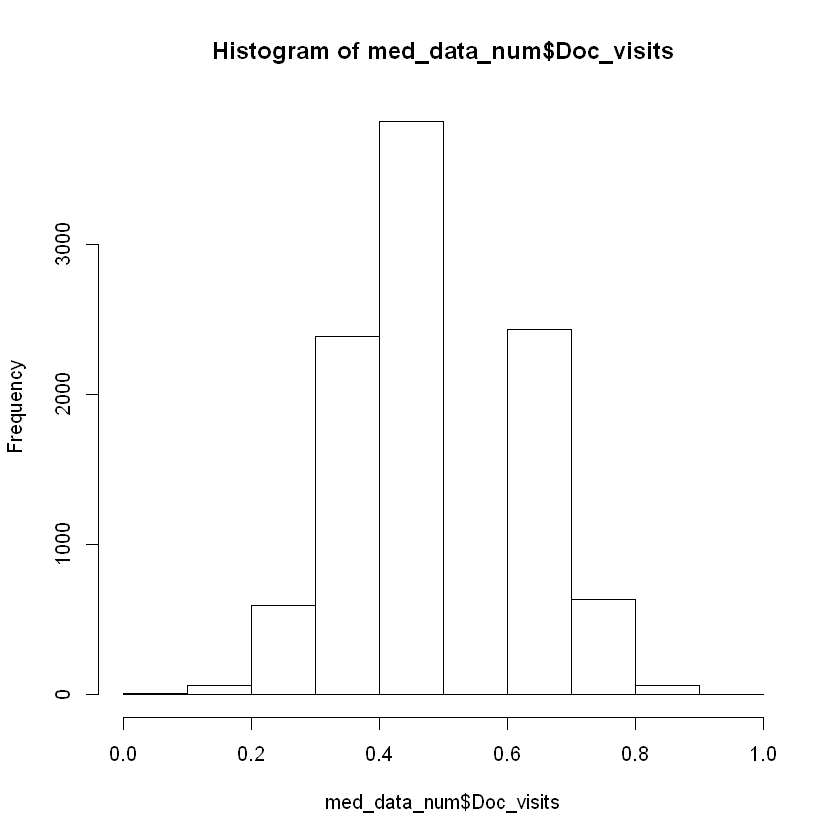

In [25]:
hist(med_data_num$Doc_visits, breaks=10)

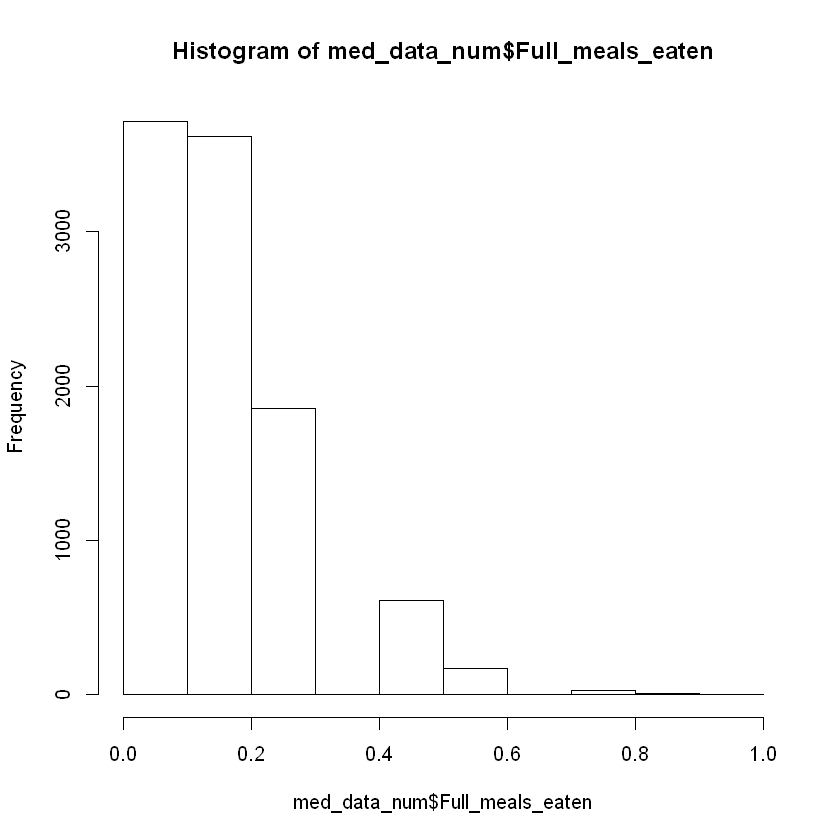

In [26]:
hist(med_data_num$Full_meals_eaten, breaks=10)

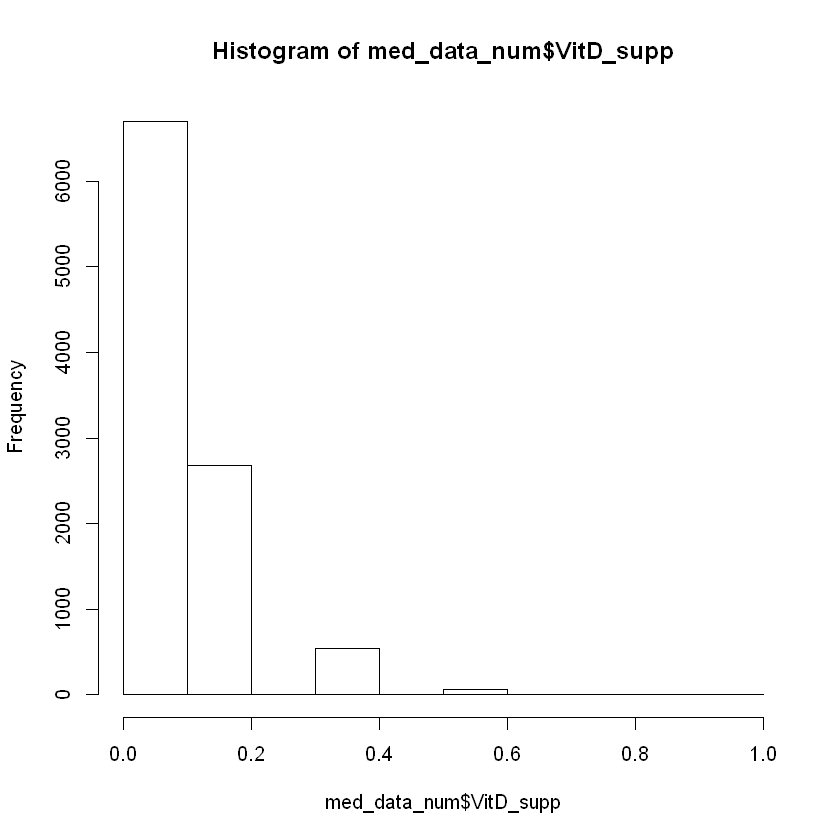

In [27]:
hist(med_data_num$VitD_supp, breaks=10)

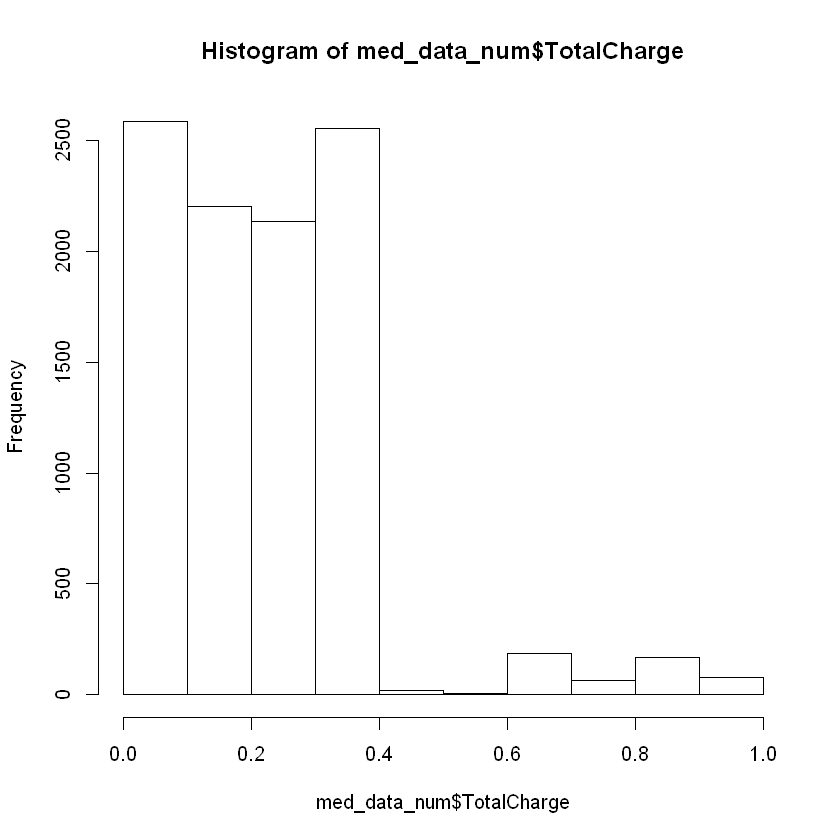

In [28]:
hist(med_data_num$TotalCharge, breaks=10)

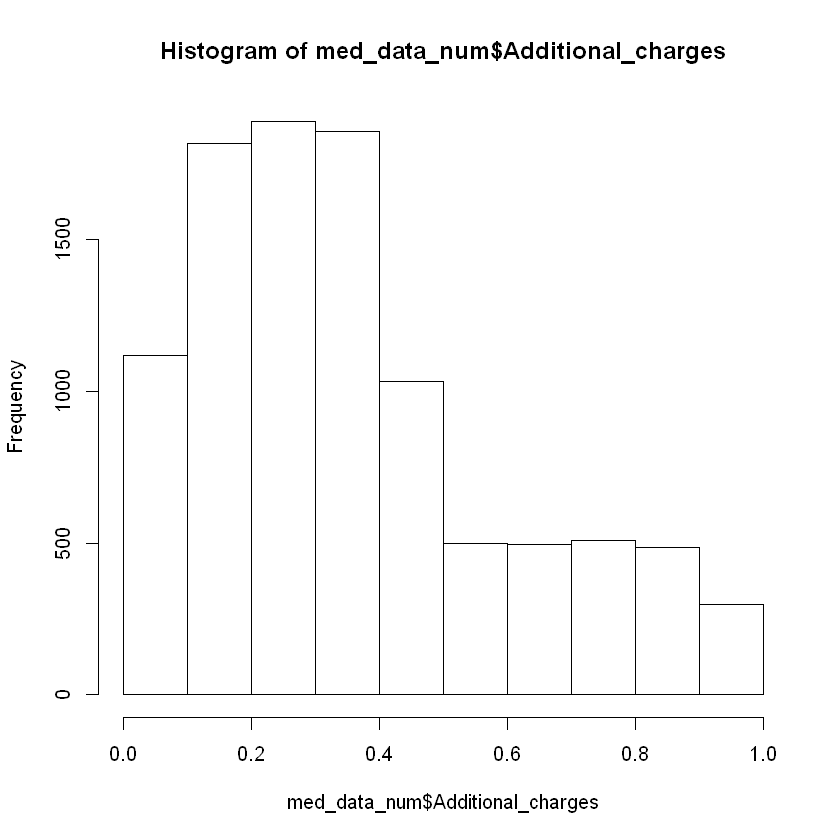

In [29]:
hist(med_data_num$Additional_charges, breaks=10)

In [30]:
med_data_items <- select(med_raw_data, Customer_id, Item1, Item2, Item3, Item4, Item5, Item6, Item7, Item8)
summary(med_data_items)

  Customer_id       Item1           Item2           Item3           Item4      
 A01882 :   1   Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 A02880 :   1   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
 A03496 :   1   Median :4.000   Median :3.000   Median :4.000   Median :4.000  
 A04182 :   1   Mean   :3.519   Mean   :3.507   Mean   :3.511   Mean   :3.515  
 A05530 :   1   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 A08637 :   1   Max.   :8.000   Max.   :7.000   Max.   :8.000   Max.   :7.000  
 (Other):9994                                                                  
     Item5           Item6           Item7           Item8     
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.00  
 Median :3.000   Median :4.000   Median :3.000   Median :3.00  
 Mean   :3.497   Mean   :3.522   Mean   :3.494   Mean   :3.51  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.

In [31]:
for (x in 2:9) {
    med_data_items[,x] <- 9 - med_data_items[,x]
}
summary(med_data_items)

  Customer_id       Item1           Item2           Item3           Item4      
 A01882 :   1   Min.   :1.000   Min.   :2.000   Min.   :1.000   Min.   :2.000  
 A02880 :   1   1st Qu.:5.000   1st Qu.:5.000   1st Qu.:5.000   1st Qu.:5.000  
 A03496 :   1   Median :5.000   Median :6.000   Median :5.000   Median :5.000  
 A04182 :   1   Mean   :5.481   Mean   :5.493   Mean   :5.489   Mean   :5.485  
 A05530 :   1   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:6.000  
 A08637 :   1   Max.   :8.000   Max.   :8.000   Max.   :8.000   Max.   :8.000  
 (Other):9994                                                                  
     Item5           Item6           Item7           Item8     
 Min.   :2.000   Min.   :2.000   Min.   :2.000   Min.   :2.00  
 1st Qu.:5.000   1st Qu.:5.000   1st Qu.:5.000   1st Qu.:5.00  
 Median :6.000   Median :5.000   Median :6.000   Median :6.00  
 Mean   :5.503   Mean   :5.478   Mean   :5.506   Mean   :5.49  
 3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.

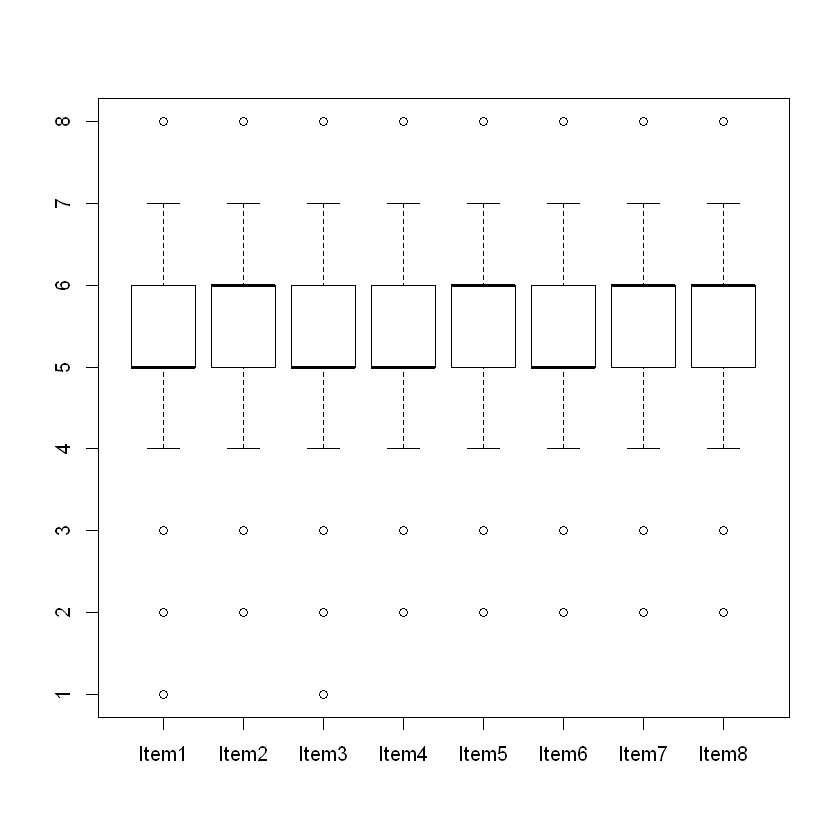

In [32]:
boxplot(med_data_items[,2:9])

In [33]:
med_data_cat <- select(med_raw_data, Customer_id, Overweight, Anxiety,  Complication_risk, Education, Employment, City, State, County, Area, Timezone, Job, Marital, Gender,
                      Soft_drink, Initial_admin, Services, ReAdmis, HighBlood, Stroke, Arthritis, Diabetes, 
                      Hyperlipidemia, BackPain, Allergic_rhinitis, Reflux_esophagitis, Asthma)

summary(med_data_cat)

  Customer_id     Overweight        Anxiety       Complication_risk
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   High  :3358      
 A02880 :   1   1st Qu.:0.0000   1st Qu.:0.0000   Low   :2125      
 A03496 :   1   Median :1.0000   Median :0.0000   Medium:4517      
 A04182 :   1   Mean   :0.7091   Mean   :0.3223                    
 A05530 :   1   3rd Qu.:1.0000   3rd Qu.:1.0000                    
 A08637 :   1   Max.   :1.0000   Max.   :1.0000                    
 (Other):9994   NA's   :982      NA's   :984                       
                                    Education         Employment  
 Regular High School Diploma             :2444   Full Time :6029  
 Bachelor's Degree                       :1724   Part Time : 991  
 Some College, 1 or More Years, No Degree:1484   Retired   : 980  
 9th Grade to 12th Grade, No Diploma     : 832   Student   :1017  
 Associate's Degree                      : 797   Unemployed: 983  
 Master's Degree                         : 701        

In [34]:
for (x in 7:17) {
    med_data_cat[,x] <- as.numeric(factor(med_data_cat[,x], levels=unique(med_data_cat[,x]), exclude=NULL))
}
summary(med_data_cat)

  Customer_id     Overweight        Anxiety       Complication_risk
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   High  :3358      
 A02880 :   1   1st Qu.:0.0000   1st Qu.:0.0000   Low   :2125      
 A03496 :   1   Median :1.0000   Median :0.0000   Medium:4517      
 A04182 :   1   Mean   :0.7091   Mean   :0.3223                    
 A05530 :   1   3rd Qu.:1.0000   3rd Qu.:1.0000                    
 A08637 :   1   Max.   :1.0000   Max.   :1.0000                    
 (Other):9994   NA's   :982      NA's   :984                       
                                    Education         Employment  
 Regular High School Diploma             :2444   Full Time :6029  
 Bachelor's Degree                       :1724   Part Time : 991  
 Some College, 1 or More Years, No Degree:1484   Retired   : 980  
 9th Grade to 12th Grade, No Diploma     : 832   Student   :1017  
 Associate's Degree                      : 797   Unemployed: 983  
 Master's Degree                         : 701        

In [35]:
for (x in 18:27) {
    med_data_cat[,x] <- as.numeric(factor(med_data_cat[,x], levels=c("No", "Yes")))
}
summary(med_data_cat)

  Customer_id     Overweight        Anxiety       Complication_risk
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   High  :3358      
 A02880 :   1   1st Qu.:0.0000   1st Qu.:0.0000   Low   :2125      
 A03496 :   1   Median :1.0000   Median :0.0000   Medium:4517      
 A04182 :   1   Mean   :0.7091   Mean   :0.3223                    
 A05530 :   1   3rd Qu.:1.0000   3rd Qu.:1.0000                    
 A08637 :   1   Max.   :1.0000   Max.   :1.0000                    
 (Other):9994   NA's   :982      NA's   :984                       
                                    Education         Employment  
 Regular High School Diploma             :2444   Full Time :6029  
 Bachelor's Degree                       :1724   Part Time : 991  
 Some College, 1 or More Years, No Degree:1484   Retired   : 980  
 9th Grade to 12th Grade, No Diploma     : 832   Student   :1017  
 Associate's Degree                      : 797   Unemployed: 983  
 Master's Degree                         : 701        

In [36]:
i <- 0
for (x in is.na(med_data_cat$Anxiety)) {
  i <- i + 1
  if(x == TRUE) {
    med_data_cat[i, "Anxiety"] <- 0
  }
}

i <- 0
for (x in is.na(med_data_cat$Overweight)) {
  i <- i + 1
  if(x == TRUE) {
    med_data_cat[i, "Overweight"] <- 0
  }
}
summary(med_data_cat)

  Customer_id     Overweight        Anxiety       Complication_risk
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   High  :3358      
 A02880 :   1   1st Qu.:0.0000   1st Qu.:0.0000   Low   :2125      
 A03496 :   1   Median :1.0000   Median :0.0000   Medium:4517      
 A04182 :   1   Mean   :0.6395   Mean   :0.2906                    
 A05530 :   1   3rd Qu.:1.0000   3rd Qu.:1.0000                    
 A08637 :   1   Max.   :1.0000   Max.   :1.0000                    
 (Other):9994                                                      
                                    Education         Employment  
 Regular High School Diploma             :2444   Full Time :6029  
 Bachelor's Degree                       :1724   Part Time : 991  
 Some College, 1 or More Years, No Degree:1484   Retired   : 980  
 9th Grade to 12th Grade, No Diploma     : 832   Student   :1017  
 Associate's Degree                      : 797   Unemployed: 983  
 Master's Degree                         : 701        

In [37]:
unique(med_data_cat$Education)

[1] Some College, Less than 1 Year          
 [2] Some College, 1 or More Years, No Degree
 [3] GED or Alternative Credential           
 [4] Regular High School Diploma             
 [5] Bachelor's Degree                       
 [6] Master's Degree                         
 [7] Nursery School to 8th Grade             
 [8] 9th Grade to 12th Grade, No Diploma     
 [9] Doctorate Degree                        
[10] Associate's Degree                      
[11] Professional School Degree              
[12] No Schooling Completed                  
12 Levels: 9th Grade to 12th Grade, No Diploma ... Some College, Less than 1 Year

In [38]:
med_data_cat$Education <- as.numeric(factor(med_data_cat$Education, levels=c('No Schooling Completed', 'Nursery School to 8th Grade', 
                                                                '9th Grade to 12th Grade, No Diploma', 'GED or Alternative Credential',
                                                                'Regular High School Diploma', 'Some College, Less than 1 Year',
                                                                'Some College, 1 or More Years, No Degree', 'Associate\'s Degree',
                                                                'Professional School Degree','Bachelor\'s Degree',
                                                                'Master\'s Degree', 'Doctorate Degree')))
summary(med_data_cat$Education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   7.000   6.608  10.000  12.000 

In [39]:
unique(med_data_cat$Employment)

[1] Full Time  Retired    Unemployed Student    Part Time 
Levels: Full Time Part Time Retired Student Unemployed

In [40]:
med_data_cat$Employment <- as.numeric(factor(med_data_cat$Employment, levels=c('Unemployed', 'Student', 'Retired', 
                                                                               'Part Time', 'Full Time')))
summary(med_data_cat$Employment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   5.000   4.007   5.000   5.000 

In [41]:
med_data_cat$Complication_risk <- as.numeric(factor(med_data_cat$Complication_risk, levels=c("Low", "Medium", "High")))
summary(med_data_cat$Complication_risk)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.123   3.000   3.000 

In [42]:
for (x in 2:27) {
    med_data_cat[,x] <- standardize(med_data_cat[,x])
}
summary(med_data_cat)

  Customer_id     Overweight        Anxiety       Complication_risk
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   
 A02880 :   1   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.5000   
 A03496 :   1   Median :1.0000   Median :0.0000   Median :0.5000   
 A04182 :   1   Mean   :0.6395   Mean   :0.2906   Mean   :0.5616   
 A05530 :   1   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   
 A08637 :   1   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   
 (Other):9994                                                      
   Education        Employment          City            State       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.3636   1st Qu.:0.5000   1st Qu.:0.1472   1st Qu.:0.1961  
 Median :0.5455   Median :1.0000   Median :0.3631   Median :0.3529  
 Mean   :0.5098   Mean   :0.7517   Mean   :0.4068   Mean   :0.3975  
 3rd Qu.:0.8182   3rd Qu.:1.0000   3rd Qu.:0.6415   3rd Qu.:0.6275  
 Max.   :1.0000   Max.   :1.0000   Max.   

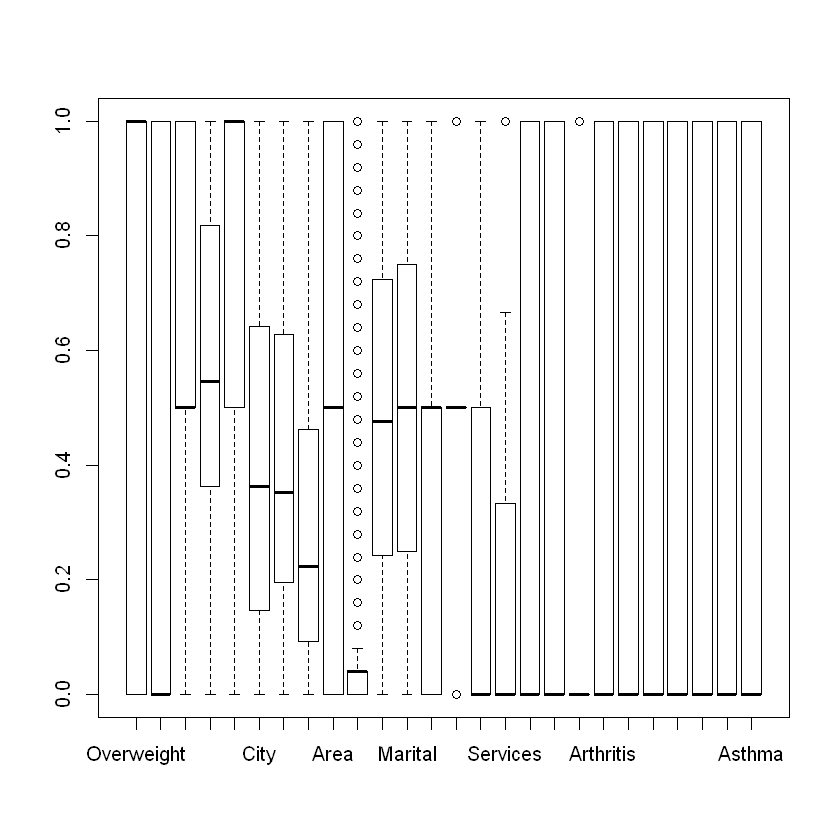

In [43]:
boxplot(med_data_cat[,2:27])

In [44]:
med_data_cleaned <- inner_join(med_data_num, med_data_items, by="Customer_id")
med_data_cleaned <- inner_join(med_data_cleaned, med_data_cat, by="Customer_id")

In [45]:
summary(med_data_cleaned)

  Customer_id        Zip              Lat              Lng        
 A01882 :   1   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 A02880 :   1   1st Qu.:0.2717   1st Qu.:0.3287   1st Qu.:0.7056  
 A03496 :   1   Median :0.4994   Median :0.4079   Median :0.7879  
 A04182 :   1   Mean   :0.4989   Mean   :0.3952   Mean   :0.7617  
 A05530 :   1   3rd Qu.:0.7229   3rd Qu.:0.4578   3rd Qu.:0.8609  
 A08637 :   1   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 (Other):9994                                                     
   Population          Children           Age             Income      
 Min.   :0.000000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.005657   1st Qu.:0.1000   1st Qu.:0.3239   1st Qu.:0.1149  
 Median :0.022546   Median :0.1000   Median :0.4930   Median :0.1632  
 Mean   :0.081141   Mean   :0.1814   Mean   :0.4961   Mean   :0.1870  
 3rd Qu.:0.113546   3rd Qu.:0.3000   3rd Qu.:0.6620   3rd Qu.:0.2236  
 Max.   :1.000000   Max.   :1.0000   M

In [46]:
write.csv(med_data_cleaned, "medical_data_cleaned.csv")

In [47]:
med_data_cleaned.pca <- prcomp(med_data_cleaned[2:49], center=TRUE, scale=TRUE)
summary(med_data_cleaned.pca)

Importance of components:
                          PC1     PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     1.7224 1.64448 1.4762 1.38533 1.28843 1.19780 1.12807
Proportion of Variance 0.0618 0.05634 0.0454 0.03998 0.03458 0.02989 0.02651
Cumulative Proportion  0.0618 0.11814 0.1635 0.20353 0.23811 0.26800 0.29451
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     1.06745 1.03972 1.03579 1.03310 1.03153 1.0275 1.02132
Proportion of Variance 0.02374 0.02252 0.02235 0.02224 0.02217 0.0220 0.02173
Cumulative Proportion  0.31825 0.34077 0.36312 0.38536 0.40753 0.4295 0.45125
                         PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     1.0206 1.01671 1.01624 1.01022 1.00847 1.00666 1.00344
Proportion of Variance 0.0217 0.02154 0.02152 0.02126 0.02119 0.02111 0.02098
Cumulative Proportion  0.4729 0.49449 0.51600 0.53726 0.55845 0.57956 0.60054
                          PC22    PC23    

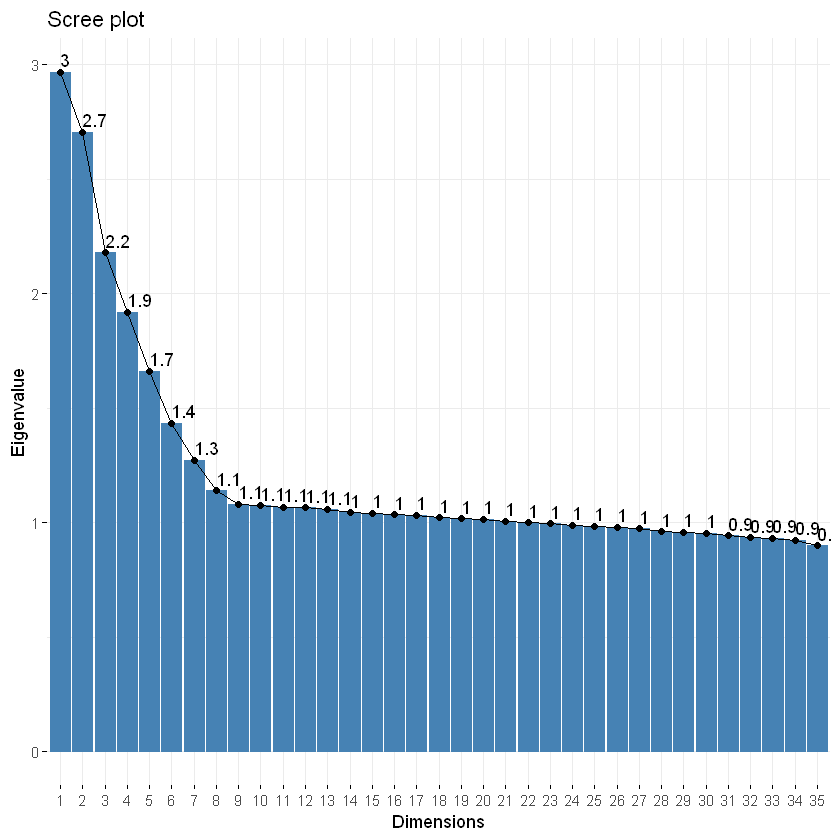

In [48]:
fviz_eig(med_data_cleaned.pca, choice="eigenvalue", addlabels=TRUE, ncp=35)

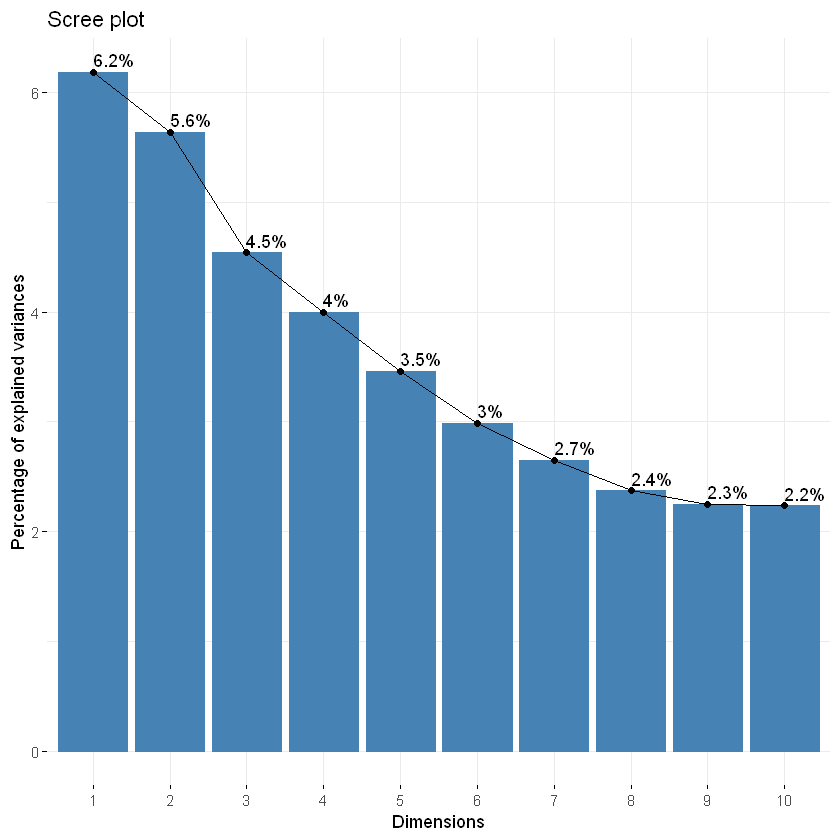

In [49]:
fviz_eig(med_data_cleaned.pca, choice="variance", addlabels=TRUE, ncp=10)

In [50]:
med_data_cleaned.pca

Standard deviations (1, .., p=48):
 [1] 1.7223640 1.6444789 1.4762421 1.3853304 1.2884263 1.1977951 1.1280662
 [8] 1.0674505 1.0397164 1.0357897 1.0330958 1.0315268 1.0275053 1.0213241
[15] 1.0205666 1.0167147 1.0162438 1.0102185 1.0084688 1.0066647 1.0034358
[22] 0.9994617 0.9972717 0.9935946 0.9913087 0.9894887 0.9868100 0.9797627
[29] 0.9780580 0.9757333 0.9708406 0.9665538 0.9646866 0.9611129 0.9481121
[36] 0.8748725 0.8579279 0.8341439 0.7986777 0.7735080 0.7634751 0.7274207
[43] 0.6858047 0.5711412 0.4436114 0.3127133 0.2743454 0.2175585

Rotation (n x k) = (48 x 48):
                             PC1          PC2           PC3           PC4
Zip                 0.0076095533  0.038104895 -5.888138e-01  6.276237e-03
Lat                -0.0092332310  0.003596831 -6.987391e-02 -1.125477e-02
Lng                -0.0024408371 -0.041523158  6.280054e-01 -2.335460e-03
Population         -0.0136748269 -0.021968236 -2.036670e-02  5.948980e-03
Children           -0.0011320650  0.008171058 -1.